In [98]:
import pandas as pd
import numpy as np

getting data


In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
len(df)
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


clean and make data uniformed

In [100]:
df.columns=df.columns.str.lower().str.replace(' ','_')
string_columns = list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

df.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


In [101]:
    columns=['engine_displacement','horsepower','vehicle_weight','fuel_efficiency_mpg','model_year']
    df = df[columns]
    df.head()

,engine_displacement,horsepower,vehicle_weight,fuel_efficiency_mpg,model_year
0,170,159.0,3413.433759,13.231729,2003
1,130,97.0,3149.664934,13.688217,2007
2,170,78.0,3079.038997,14.246341,2018
3,220,NaN,2542.392402,16.912736,2009
4,210,140.0,3460.870990,12.488369,2009


finding horsepower mean //Q2


In [102]:
horsepower_median = df['horsepower'].median()
horsepower_median

np.float64(149.0)

In [103]:
horsepower_mean = df['horsepower'].mean()
horsepower_mean


np.float64(149.65729212983547)

In [104]:
horsepower_max = df['horsepower'].max()
horsepower_min = df['horsepower'].min()
horsepower_mid = (horsepower_max + horsepower_min)/2
horsepower_max, horsepower_min, horsepower_mid


(np.float64(271.0), np.float64(37.0), np.float64(154.0))

In [105]:
horsepower_na_zero= df['horsepower'].fillna(0)
horsepower_na_mean= df['horsepower'].fillna(horsepower_mean)
horsepower_mean_z= horsepower_na_zero.mean()
horsepower_mean_m= horsepower_na_mean.mean()
print(horsepower_mean_z, horsepower_mean_m)

138.73835531739488 149.6572921298355


choosing to fil NAs with zeros and calculate RMSE, than we try with mean instead


fill with zeros


In [106]:
df.horsepower = df.horsepower.fillna(0)
df.horsepower 



0       159.0
1        97.0
2        78.0
3         0.0
4       140.0
        ...  
9699    164.0
9700    154.0
9701    138.0
9702    177.0
9703    140.0
Name: horsepower, Length: 9704, dtype: float64

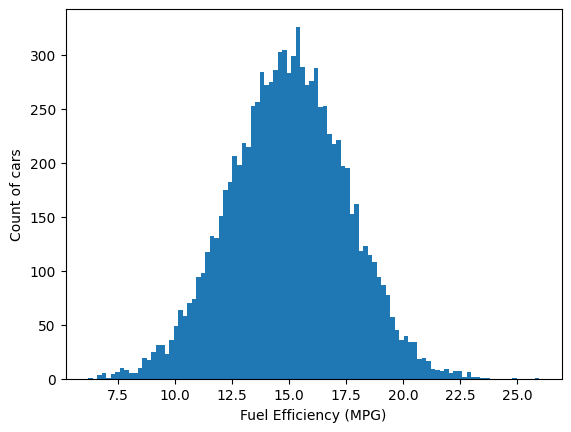

In [107]:
import matplotlib.pyplot as plt
plt.hist(df.fuel_efficiency_mpg, bins=100)
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Count of cars')
plt.show()

VALIDATION FRAMEWORK

In [108]:
np.random.seed(42)
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n - n_val - n_test


In [109]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.array(df_train.fuel_efficiency_mpg.values)
y_val = np.array(df_val.fuel_efficiency_mpg.values)
y_test = np.array(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
df_train.head()


,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006


LINEAR REG

In [110]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [111]:
X_train = df_train.values
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [112]:
import seaborn as sns

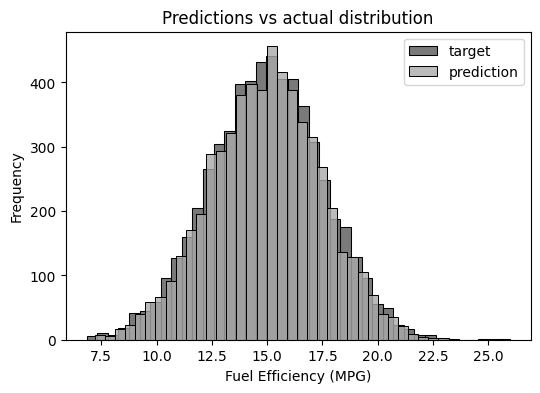

In [113]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)
plt.legend()


plt.ylabel('Frequency')
plt.xlabel('Fuel Efficiency (MPG)')
plt.title('Predictions vs actual distribution')

plt.show()


In [114]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [115]:
score = rmse(y_train, y_pred)
round(score, 2)

np.float64(0.52)

with filling nan vals with mean vals, the rmse is 0.46, but with filling with zeros , the rsme is 0.52

we going back to filling with zero just for q4

In [116]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]

In [117]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]


In [118]:

for r in r_list:
    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w_0 + X_train.dot(w)
    score = rmse(y_train, y_pred)
    print(r, round(score, 3))


0 0.52
0.01 0.52
0.1 0.524
1 0.528
5 0.529
10 0.529
100 0.529


we will change the split values now; used to be 42, gonna try different values

In [120]:
seed_list =[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for seed in seed_list:
    np.random.seed(seed)
    n = len(df)
    n_val = int(n*0.2)
    n_test = int(n*0.2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.fuel_efficiency_mpg.values
    y_val_orig = df_val.fuel_efficiency_mpg.values
    y_test_orig = df_test.fuel_efficiency_mpg.values


    y_train = np.array(df_train.fuel_efficiency_mpg.values)
    y_val = np.array(df_val.fuel_efficiency_mpg.values)
    y_test = np.array(df_test.fuel_efficiency_mpg.values)

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    df.fillna(0, inplace=True)
    



In [121]:
# Experiment: try seeds 0..9, 60/20/20 split, fill NAs with 0, train unregularized linear regression
# Collect validation RMSEs and print their standard deviation (rounded to 3 decimals)
import numpy as np

def rmse(y, y_pred):
    return np.sqrt(((y - y_pred) ** 2).mean())

seed_list = list(range(10))
val_scores = []

n = len(df)
for seed in seed_list:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].reset_index(drop=True)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()

    # fill NA with 0
    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)
    df_test = df_test.fillna(0)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values

    X_train = df_train.drop(columns=['fuel_efficiency_mpg']).values
    X_val = df_val.drop(columns=['fuel_efficiency_mpg']).values

    w0, w = train_linear_regression(X_train, y_train)
    y_val_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_val_pred)
    val_scores.append(score)

std_val = np.std(val_scores)
print('validation RMSEs:', [round(s,4) for s in val_scores])
print('std:', round(std_val, 3))
# store for later inspection
val_scores_all_seeds = val_scores
std_val_all_seeds = std_val

validation RMSEs: [np.float64(0.5207), np.float64(0.5213), np.float64(0.5228), np.float64(0.516), np.float64(0.5109), np.float64(0.5283), np.float64(0.5314), np.float64(0.5091), np.float64(0.5147), np.float64(0.5132)]
std: 0.007


# Split with seed=9, combine train+val, fill NAs with 0, train with r=0.001 and evaluate on test


In [127]:
seed = 9
np.random.seed(seed)

n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

# combine train + validation
trainval = pd.concat([df_train, df_val], ignore_index=True)

# fill missing values with 0
trainval = trainval.fillna(0)
df_test = df_test.fillna(0)

# prepare X and y
y_trainval = trainval.fuel_efficiency_mpg.values
X_trainval = trainval.drop(columns=['fuel_efficiency_mpg']).values

y_test = df_test.fuel_efficiency_mpg.values
X_test = df_test.drop(columns=['fuel_efficiency_mpg']).values

# train with regularization r=0.001
r = 0.001
w0_final, w_final = train_linear_regression_reg(X_trainval, y_trainval, r=r)

y_test_pred = w0_final + X_test.dot(w_final)

test_rmse = rmse(y_test, y_test_pred)
print('Test RMSE (seed=9, r=0.001):', round(test_rmse, 4))
# store result
test_rmse_seed9_r0001 = test_rmse

Test RMSE (seed=9, r=0.001): 0.5156
